In [1]:
# This code analyzes the simulation results in ../outputs/oscillation/ folder and plots Figure 4.

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import statistics
import math
from matplotlib.ticker import ScalarFormatter
import numpy as np
import datetime
cmap = plt.get_cmap("tab10")

In [3]:
def readdata(filename):
    f = open(filename,"rb")
    gw0 = pickle.load(f)
    return gw0
folder="../outputs/oscillation/"
num_trial=20
duration=num_trial*20*num_trial
LN0_normal=readdata(folder+"LN0_normal.txt")
LN1_normal=readdata(folder+"LN1_normal.txt")
LN2_normal=readdata(folder+"LN2_normal.txt")
LN3_normal=readdata(folder+"LN3_normal.txt")
LN_normal=readdata(folder+"LN_normal.txt")
PN_normal=readdata(folder+"PN_normal.txt")
KC_normal=readdata(folder+"KC_normal.txt")
t0_normal=readdata(folder+"t0_normal.txt")
PN_LN0inact=readdata(folder+"PN_LN0inact.txt")
PN_LN1inact=readdata(folder+"PN_LN1inact.txt")
PN_LN2inact=readdata(folder+"PN_LN2inact.txt")
PN_LN3inact=readdata(folder+"PN_LN3inact.txt")

In [4]:
def print_fft(w,xlim_start,xlim_end):
    l0=w[int(xlim_start*1000):int(xlim_end*1000)]
    N=int(len(l0)/1)
    dt=0.001
    amp = np.abs(np.fft.fft(l0))
    freq = np.fft.fftfreq(N, d=dt)
    power = amp**2
    return freq[1:int(N/2)], power[1:int(N/2)]
def make_fft_fig(ax0,ax1,ax2,gwt0,gw0,gw1,gw2,i):
    f0,a0=print_fft(gw0,1+i*20,9+i*20)
    f1,a1=print_fft(gw0,11+i*20,19+i*20)
    f2,a2=print_fft(gw2,1+i*20,9+i*20)
    f3,a3=print_fft(gw1,1+i*20,9+i*20)
    ax0.plot(f0,list(map(lambda x:x,a0)),color=cmap(0), zorder=0,label="PN")
    ax0.set_xlim(0,80)
    ax0.legend()
    ax0.set_xlabel("Freqency [Hz]")
    ax0.set_ylabel("Power")
    ax0.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax0.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax1.plot(f3,list(map(lambda x:x,a3)),color=cmap(1),label="LN")
    ax1.set_xlim(0,80)
    ax1.legend()
    ax1.set_xlabel("Freqency [Hz]")
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax2.plot(f2,list(map(lambda x:x,a2)),color=cmap(2), zorder=1,label="KC")
    ax2.set_xlim(0,80)
    ax2.legend()
    ax2.set_xlabel("Freqency [Hz]")
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    return f0,a0,f1,a1,f2,a2,f3,a3
def make_fft_fig_peak(ax,gwt0,gw0,gw1,gw2,n):
    c0=np.zeros((5,n))
    for i in range(n):
        f0,a0=print_fft(gw0,1+i*20,9+i*20)        
        f1,a1=print_fft(gw2,1+i*20,9+i*20)
        f2,a2=print_fft(gw1,1+i*20,9+i*20)
        f3,a3=print_fft(gw0,11+i*20,19+i*20)
        c0[0][i]=max(a0)
        c0[2][i]=max(a1)
        c0[1][i]=max(a2)
        c0[3][i]=max(a3)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax.bar(1,np.average(c0[0]),color=cmap(0),label="PN")
    ax.bar(2,np.average(c0[1]),color=cmap(1),label="LN")
    ax.bar(3,np.average(c0[2]),color=cmap(2),label="KC")
    ax.bar(4,np.average(c0[3]),color=cmap(3),label="PN no odor")
    ax.errorbar([1,2,3,4],[np.average(c0[0]),np.average(c0[1]),np.average(c0[2]),np.average(c0[3])], yerr=[statistics.stdev(c0[0]),statistics.pstdev(c0[1]),statistics.stdev(c0[2]),statistics.stdev(c0[3])],fmt='none',ecolor='black',capsize=5)
    ax.legend(loc='upper right')
    ax.set_yscale("log")
    ax.set_xticks([])
    dt_now=str(datetime.datetime.now())
    dt_now=dt_now.replace('.', '-')
    dt_now=dt_now.replace(' ', '-')
    dt_now=dt_now.replace(':', '-')
    return c0[0],c0[1],c0[2],c0[3]
def make_fft_fig_peak_each_odor(ax0,ax1,gwt0,gw0,gw1,gw2,gw3,n):
    c0=np.zeros((2,6,int(n/6)))
    for i in range(n):
        f0,a0=print_fft(gw0,1+i*20,9+i*20)
        f1,a1=print_fft(gw1,1+i*20,9+i*20)        
        c0[0][i%6][int(i/6)]=max(a0)
        c0[1][i%6][int(i/6)]=max(a1)
    for i in range(6):
        ax0.bar(i+1,np.average(c0[0][i]),color=cmap(0))
    for i in range(6):
        ax1.bar(i+7,np.average(c0[1][i]),color=cmap(1))  
    print(c0)
def fig_LN(ax,PN_s,name,xlim_start,xlim_end):
    f0,a0=print_fft(PN_s,xlim_start,xlim_end)
    ax.plot(f0,a0,color=cmap(8),label=name)
    ax.set_xlim(0,80)
    ax.legend(loc='upper left',fontsize=9)
    ax.set_xlabel("Freqency [Hz]")
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    return max(a0)
def plot_LNonly(ax1,ax2,ax3,ax4,i):        
    xlim_start=1+20*i
    xlim_end=9+20*i
    r0=fig_LN(ax1,LN0_normal,"LN \nKrasavietz_class1",xlim_start,xlim_end)
    r0=fig_LN(ax2,LN1_normal,"LN \nKrasavietz_class2",xlim_start,xlim_end)
    r0=fig_LN(ax3,LN2_normal,"LN \nNP1227_class1",xlim_start,xlim_end)
    r0=fig_LN(ax4,LN3_normal,"LN \nNP2426_class1",xlim_start,xlim_end)
def plot_LNonly_peak(ax,n):
    c0=np.zeros((5,n))
    for i in range(n):
        xlim_start=1+20*i
        xlim_end=9+20*i
        f0,a0=print_fft(LN0_normal,xlim_start,xlim_end)
        c0[0][i]=max(a0)
        f0,a0=print_fft(LN1_normal,xlim_start,xlim_end)
        c0[1][i]=max(a0)
        f0,a0=print_fft(LN2_normal,xlim_start,xlim_end)
        c0[2][i]=max(a0)
        f0,a0=print_fft(LN3_normal,xlim_start,xlim_end)
        c0[3][i]=max(a0)
        f0,a0=print_fft(LN_normal,xlim_start,xlim_end)
        c0[4][i]=max(a0)
    ax.bar("(i)",np.average(c0[0]),color=cmap(8))
    ax.bar("(ii)",np.average(c0[1]),color=cmap(8))
    ax.bar("(iii)",np.average(c0[2]),color=cmap(8))
    ax.bar("(iv)",np.average(c0[3]),color=cmap(8))
    ax.bar("(v)",np.average(c0[4]),color=cmap(1))
    ax.errorbar(["(i)","(ii)","(iii)","(iv)","(v)"],[np.average(c0[0]),np.average(c0[1]),np.average(c0[2]),np.average(c0[3]),np.average(c0[4])], yerr=[statistics.pstdev(c0[0]),statistics.stdev(c0[1]),statistics.stdev(c0[2]),statistics.stdev(c0[3]),statistics.stdev(c0[4])],fmt='none',ecolor='black',capsize=5)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    dt_now=str(datetime.datetime.now())
    dt_now=dt_now.replace('.', '-')
    dt_now=dt_now.replace(' ', '-')
    dt_now=dt_now.replace(':', '-')
    return c0[0],c0[1],c0[2],c0[3],c0[4]
def plot_LNinact_peak(ax,n):
    c0=np.zeros((5,n))
    for i in range(n):
        xlim_start=1+20*i
        xlim_end=9+20*i
        f0,a0=print_fft(PN_LN0inact,xlim_start,xlim_end)
        c0[0][i]=max(a0)
        f0,a0=print_fft(PN_LN1inact,xlim_start,xlim_end)
        c0[1][i]=max(a0)
        f0,a0=print_fft(PN_LN2inact,xlim_start,xlim_end)
        c0[2][i]=max(a0)
        f0,a0=print_fft(PN_LN3inact,xlim_start,xlim_end)
        c0[3][i]=max(a0)
        f0,a0=print_fft(PN_normal,xlim_start,xlim_end)
        c0[4][i]=max(a0)
    ax.bar("(i)",np.average(c0[0]),color=cmap(9))
    ax.bar("(ii)",np.average(c0[1]),color=cmap(9))
    ax.bar("(iii)",np.average(c0[2]),color=cmap(9))
    ax.bar("(iv)",np.average(c0[3]),color=cmap(9))
    ax.bar("(v)",np.average(c0[4]),color=cmap(0))
    ax.errorbar(["(i)","(ii)","(iii)","(iv)","(v)"],[np.average(c0[0]),np.average(c0[1]),np.average(c0[2]),np.average(c0[3]),np.average(c0[4])], yerr=[statistics.pstdev(c0[0]),statistics.stdev(c0[1]),statistics.stdev(c0[2]),statistics.stdev(c0[3]),statistics.stdev(c0[4])],fmt='none',ecolor='black',capsize=5)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    return c0[0],c0[1],c0[2],c0[3],c0[4]
def print_txt(l0,f0):
    with open(f0, "w") as f:
        for item in l0:
            f.write("%s\n" % item)

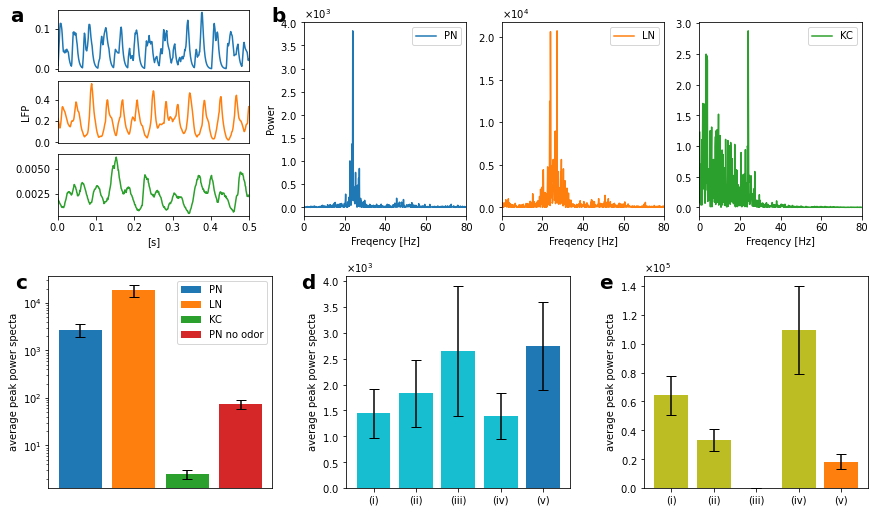

In [5]:
from matplotlib import gridspec

fig = plt.figure(constrained_layout=True, figsize=(12,7))
subfigs = fig.subfigures(2, 1,hspace=0.05, height_ratios=[1,1])
subsubfigs = subfigs[0].subfigures(1, 2,wspace=0.01, width_ratios=[1.25, 3])
spec = gridspec.GridSpec(ncols=1, nrows=3,figure=subsubfigs[0],hspace=-0.1, height_ratios=[1, 1, 1])
ax000 = subsubfigs[0].add_subplot(spec[0])
ax001 = subsubfigs[0].add_subplot(spec[1])
ax002 = subsubfigs[0].add_subplot(spec[2])
ax000.text(-0.25, 0.8, "a", ha='left',fontsize=20, fontweight='bold', transform=ax000.transAxes)
xlim_start=7
xlim_end=7.5
l1=PN_normal[int(xlim_start*1000):int((xlim_end)*1000)]
l2=LN_normal[int(xlim_start*1000):int((xlim_end)*1000)]
l3=KC_normal[int(xlim_start*1000):int((xlim_end)*1000)]
ax000.plot(np.arange(0, xlim_end-xlim_start,(xlim_end-xlim_start)/len(l1)),l1,'C0',label="PN")
ax001.plot(np.arange(0, xlim_end-xlim_start,(xlim_end-xlim_start)/len(l2)),l2,'C1',label="LN")
ax002.plot(np.arange(0, xlim_end-xlim_start,(xlim_end-xlim_start)/len(l3)),l3,'C2',label="KC")
ax000.set_xlim(0,xlim_end-xlim_start)
ax001.set_xlim(0,xlim_end-xlim_start)
ax002.set_xlim(0,xlim_end-xlim_start)
ax000.axes.xaxis.set_ticks([])
ax001.axes.xaxis.set_ticks([])
ax001.set_ylabel("LFP")
ax002.set_xlabel("[s]")
print_txt(np.arange(0, xlim_end-xlim_start,(xlim_end-xlim_start)/len(l1)),"../outputs/FigSourceData/Fig4a_[s].txt")
print_txt(l1,"../outputs/FigSourceData/Fig4a_PN.txt")
print_txt(l2,"../outputs/FigSourceData/Fig4a_LN.txt")
print_txt(l3,"../outputs/FigSourceData/Fig4a_KC.txt")

spec = gridspec.GridSpec(ncols=3, nrows=1,figure=subsubfigs[1],wspace=-0.1, width_ratios=[1,1,1])
ax010 = subsubfigs[1].add_subplot(spec[0])
ax011 = subsubfigs[1].add_subplot(spec[1])
ax012 = subsubfigs[1].add_subplot(spec[2])
f0,a0,f1,a1,f2,a2,f3,a3=make_fft_fig(ax010,ax011,ax012,t0_normal,PN_normal,LN_normal,KC_normal,0)
ax010.text(-0.2, 1, "b", ha='left',fontsize=20, fontweight='bold', transform=ax010.transAxes)
print_txt(f0,"../outputs/FigSourceData/Fig4b_PN_F.txt")
print_txt(a0,"../outputs/FigSourceData/Fig4b_PN_P.txt")
print_txt(f1,"../outputs/FigSourceData/Fig4b_LN_F.txt")
print_txt(a1,"../outputs/FigSourceData/Fig4b_LN_P.txt")
print_txt(f2,"../outputs/FigSourceData/Fig4b_KC_F.txt")
print_txt(a2,"../outputs/FigSourceData/Fig4b_KC_P.txt")

spec = gridspec.GridSpec(ncols=3, nrows=1,figure=subfigs[1],wspace=0.1, width_ratios=[1,1,1])
ax100 = subfigs[1].add_subplot(spec[0])
ax101 = subfigs[1].add_subplot(spec[1])
ax102 = subfigs[1].add_subplot(spec[2])
r0,r1,r2,r3=make_fft_fig_peak(ax100,t0_normal,PN_normal,LN_normal,KC_normal,num_trial)
ax100.text(-0.15, 0.94, "c", ha='left',fontsize=20, fontweight='bold', transform=ax100.transAxes)
ax100.set_ylabel("average peak power specta")
print_txt(r0,"../outputs/FigSourceData/Fig4c_PN.txt")
print_txt(r1,"../outputs/FigSourceData/Fig4c_LN.txt")
print_txt(r2,"../outputs/FigSourceData/Fig4c_KC.txt")
print_txt(r3,"../outputs/FigSourceData/Fig4c_PNnoodor.txt")

r0,r1,r2,r3,r4=plot_LNinact_peak(ax101,num_trial)
ax101.text(-0.2, 0.94, "d", ha='left',fontsize=20, fontweight='bold', transform=ax101.transAxes)
spec = gridspec.GridSpec(ncols=1, nrows=2,figure=subsubfigs[1],hspace=0, height_ratios=[1,0.07])
ax101.set_ylabel("average peak power specta")
print_txt(r0,"../outputs/FigSourceData/Fig4d_i.txt")
print_txt(r1,"../outputs/FigSourceData/Fig4d_ii.txt")
print_txt(r2,"../outputs/FigSourceData/Fig4d_iii.txt")
print_txt(r3,"../outputs/FigSourceData/Fig4d_iv.txt")
print_txt(r4,"../outputs/FigSourceData/Fig4d_v.txt")

r0,r1,r2,r3,r4=plot_LNonly_peak(ax102,num_trial)
ax102.text(-0.2, 0.94, "e", ha='left',fontsize=20, fontweight='bold', transform=ax102.transAxes)
ax102.set_ylabel("average peak power specta")
print_txt(r0,"../outputs/FigSourceData/Fig4e_i.txt")
print_txt(r1,"../outputs/FigSourceData/Fig4e_ii.txt")
print_txt(r2,"../outputs/FigSourceData/Fig4e_iii.txt")
print_txt(r3,"../outputs/FigSourceData/Fig4e_iv.txt")
print_txt(r4,"../outputs/FigSourceData/Fig4e_v.txt")

plt.savefig("../outputs/figs/oscillations.svg", format="svg")

### 

### 